In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Authenticate with Kaggle
api = KaggleApi()
api.authenticate()

# Specify the dataset you want to download (using the dataset link provided)
dataset = 'jsphyg/weather-dataset-rattle-package'  # Dataset slug from Kaggle
download_path = os.getcwd()  # This will save the file to the current working directory

# Download the dataset
api.dataset_download_files(dataset, path=download_path, unzip=True)

print(f"Dataset downloaded and extracted to {download_path}")

ModuleNotFoundError: No module named 'kaggle'

In [2]:
import pandas as pd
# Load the dataset into a DataFrame
file_path = 'weatherAUS.csv'  # Adjust the file name if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [3]:
# print the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Convert Rain Tomorrow column to binary
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
# convert Rain Today column to binary
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

IndexError: index 0 is out of bounds for axis 0 with size 0

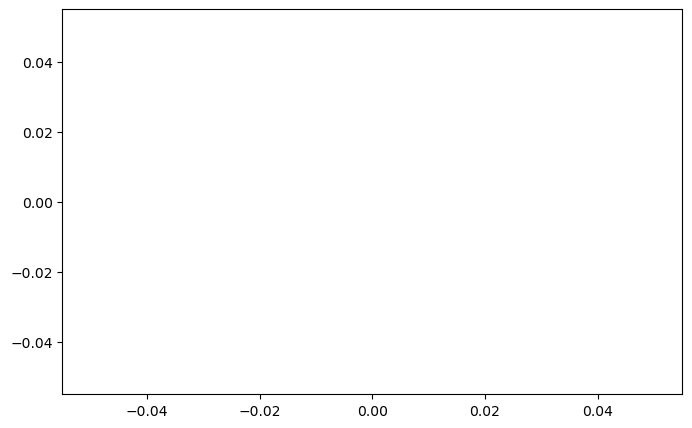

In [6]:
# Show the class imbalance For Rainfall Prediction
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','blue'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

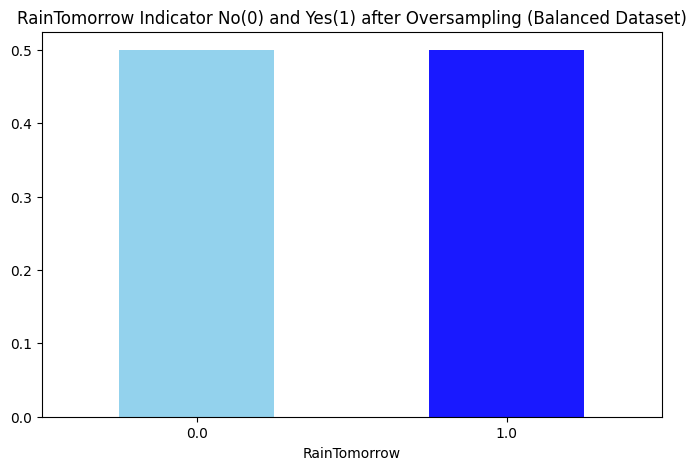

In [ ]:
# Handling Class Imbalance For Rainfall Prediction
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','blue'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [ ]:
# create a table of the misssing values of each column
missing_values = df.isnull().sum()
# perentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
# create a dataframe of the missing values and their percentages of each column in decending order
value = {
    'missing_values ':missing_values,
    'percent_missing %':missing_percentage, 
     'data type' : df.dtypes
}
df_missing =pd.DataFrame(value).sort_values(by = 'missing_values ',ascending = False)
# display the dataframe
df_missing


,missing_values,percent_missing %,data type
Sunshine,69835,48.009762,float64
Evaporation,62790,43.166506,float64
Cloud3pm,59358,40.807095,float64
Cloud9am,55888,38.421559,float64
Pressure9am,15065,10.356799,float64
Pressure3pm,15028,10.331363,float64
WindDir9am,10566,7.263853,object
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
Humidity3pm,4507,3.098446,float64


<Axes: >

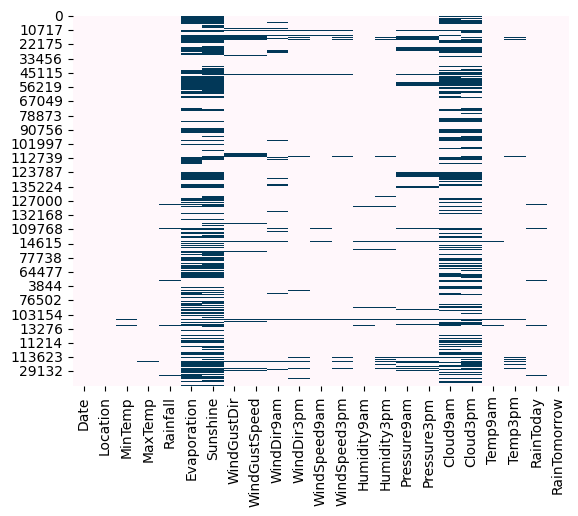

In [ ]:
# missing data patterns in the training dataset
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [ ]:
# select categorical features
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [ ]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
import enable_iterative_imputer

ModuleNotFoundError: No module named 'enable_iterative_imputer'

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa

In [ ]:
import warnings
from sklearn.impute import IterativeImputer

warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
modified_df = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
modified_df.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [ ]:
# Detecting outliers with IQR
Q1 = modified_df.quantile(0.25)
Q3 = modified_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.120044
Sunshine            5.979485
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.684676
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [ ]:
# Removing outliers from the dataset
modified_df = modified_df[~((modified_df < (Q1 - 1.5 * IQR)) |(modified_df > (Q3 + 1.5 * IQR))).any(axis=1)]
modified_df.shape

(170669, 23)

In [ ]:
# ReCheck the number of null numbers
modified_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

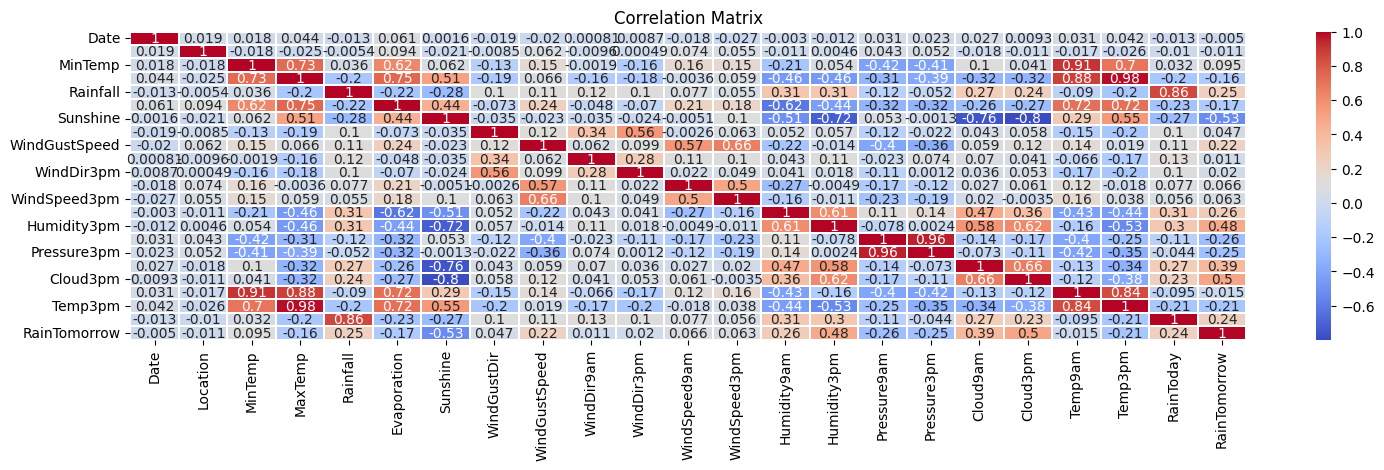

In [ ]:
# plot correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the correlation matrix
plt.figure(figsize=(18, 4))
correlation_matrix = modified_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.25)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.StandardScaler()
r_scaler.fit(modified_df)
standard_df = pd.DataFrame(r_scaler.transform(modified_df), index=modified_df.index, columns=modified_df.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# fix the target variable
features = modified_df.drop('RainTomorrow', axis=1)
# remove the date column which will not result in any predictive power
features = features.drop('Date', axis=1)

target = modified_df['RainTomorrow']

# Split into 20% test and 80% train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

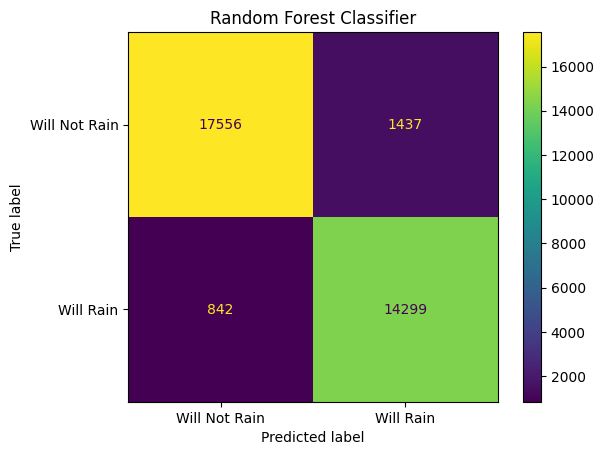

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94     18993
         1.0       0.91      0.94      0.93     15141

    accuracy                           0.93     34134
   macro avg       0.93      0.93      0.93     34134
weighted avg       0.93      0.93      0.93     34134

Random Forest F1 Score: 0.926191015966577
Random Forest Classifier Accuracy: 93.3233725903791


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

# Create Random Forest classifer object
rf_model = RandomForestClassifier(**params_rf)

# Train Random Forest Classifer
rf_model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rf_model.predict(X_test)

rf_cm = metrics.confusion_matrix(y_test,y_pred)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = ["Will Not Rain", "Will Rain"])

# Plot Random Forest Confusion Matrix
rf_cm_display.plot()
plt.title('Random Forest Classifier')
plt.show()
# Random Forest Classification Report
print(classification_report(y_test, y_pred))

# Random Forest F1 Score
f1_score = metrics.f1_score(y_test, y_pred)
print("Random Forest F1 Score:", f1_score)
# Random Forest Accuracy
accuracy_rf = metrics.accuracy_score(y_test, y_pred)*100

# Random Forest Accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# add hyperparameters open cv
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
# print the accuracy of the best model
print(knn_cv.best_score_)
print(knn_cv.best_params_)
print(knn_cv.best_estimator_)


0.8769853274164096
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


F1 Score: 0.8983960443801254
KNN Accuracy: 90.12714595418059
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90     18993
         1.0       0.83      0.98      0.90     15141

    accuracy                           0.90     34134
   macro avg       0.91      0.91      0.90     34134
weighted avg       0.91      0.90      0.90     34134



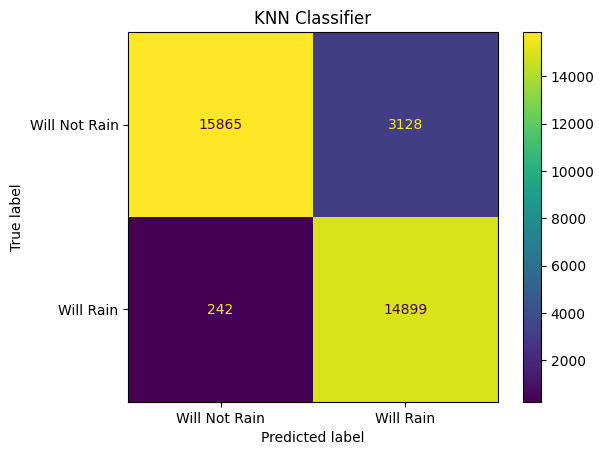

In [ ]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# plot the confusion matrix of the best model
knn_cv = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
# f1 score
f1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score:", f1_score)
# accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_pred)*100
print("KNN Accuracy:", accuracy_knn)
# classification report
print(classification_report(y_test, y_pred))
# plot confusion matrix
knn_cm = metrics.confusion_matrix(y_test,y_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = ["Will Not Rain", "Will Rain"])
knn_cm_display.plot()
plt.title('KNN Classifier')
plt.show()

In [ ]:
# model comparison table with accuracy and f1 score
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'KNN'],
    'Accuracy': [accuracy_rf, accuracy_knn],
    'F1 Score': [f1_score, f1_score]
})

model_comparison

,Model,Accuracy,F1 Score
0,Random Forest,93.323373,0.898396
1,KNN,90.127146,0.898396
